In [ ]:
!pip install torchvision && pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"
#!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2' 
!pip install layoutparser # Install the base layoutparser library with  
!pip install "layoutparser[layoutmodels]" 
!pip install "layoutparser[ocr]" 
!pip install "layoutparser[paddledetection]"
!pip install "layoutparser[effdet]"
!pip install 'spacy[transformers]'
!pip install pillow
!pip install pdfplumber
!pip install pdf2image
!pip install tqdm
!pip install pybtex
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install transformers
!apt-get install -y poppler-utils

In [ ]:
!git clone https://github.com/Layout-Parser/layout-parser.git
%cd layout-parser/

In [ ]:
import re
import os
import cv2
import spacy
import string
import spacy.cli
import numpy as np
import pytesseract
import pandas as pd
import torch.nn as nn
import pybtex.database
import spacy_transformers
import layoutparser as lp
#-----------------------------------#
import traceback
import multiprocessing
from tqdm import tqdm
import pdf2image
import pdfplumber
from PIL import Image
print(pdfplumber.__version__)


0.9.0


In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git              

Cloning into 'detectron2'...
remote: Enumerating objects: 15043, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 15043 (delta 33), reused 55 (delta 31), pack-reused 14975
Receiving objects: 100% (15043/15043), 6.12 MiB | 11.24 MiB/s, done.
Resolving deltas: 100% (10896/10896), done.


load  the  path of configs/Base-RCNN-FPN.yaml  from detectorn  to  _BASE_: "/content/configs/Base-RCNN-FPN.yaml"
  in x101.yamel

In [ ]:
model = lp.Detectron2LayoutModel(config_path = "/content/X101/X101.yaml",model_path = "/content/X101/model.pth",label_map={0: "Abstract", 1: "Author", 2: "Caption", 3:"Date", 4:"Equation",5: "Figure", 6: "Footer", 7: "List", 8:"Paragraph", 9:"Reference", 10: "Section", 11: "Table", 12:"Title"})

  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


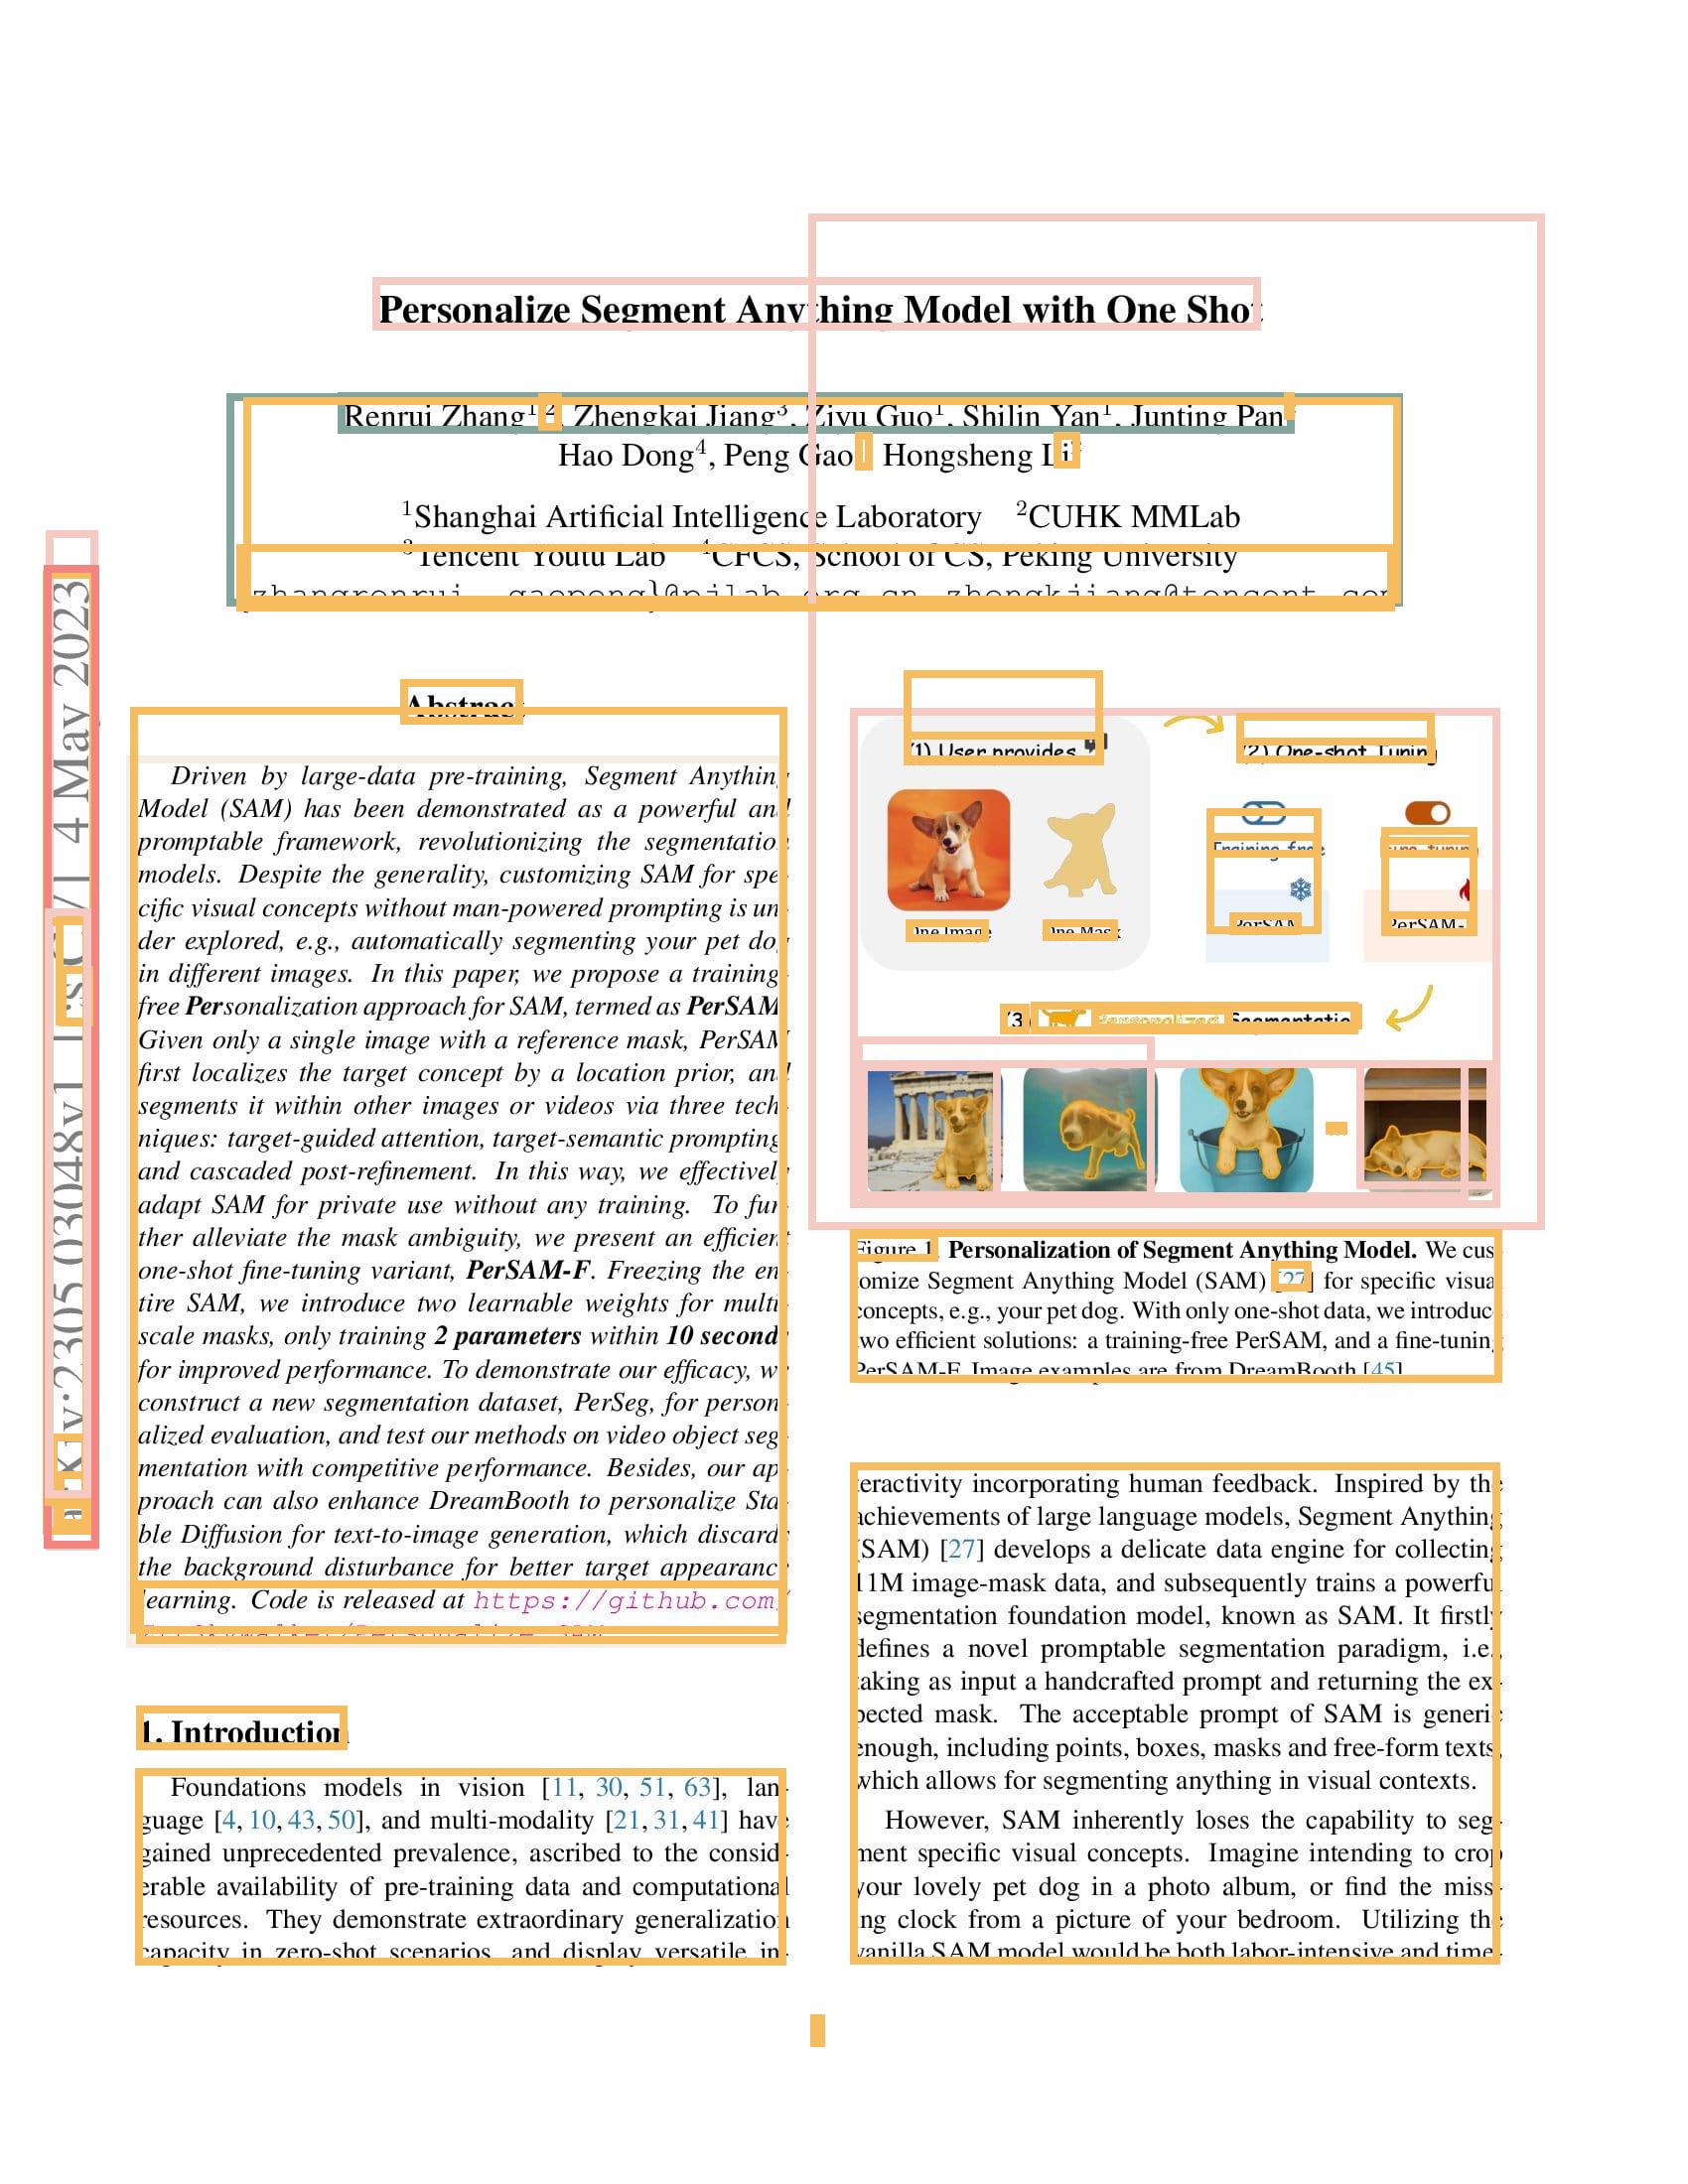

In [ ]:
image = cv2.imread("/content/images/fe0fe88b-2305.03048v1_00001.jpg")
image = image[..., ::-1] 
layout = model.detect(image)
lp.draw_box(image, layout)

In [ ]:
all_titles = []
title_blocks = lp.Layout([b for b in layout if b.type=="Title"])

text_blocks = lp.Layout([b for b in title_blocks])
h, w = image.shape[:2]
left_interval = lp.Interval(0, w/21.05, axis='x').put_on_canvas(image)
left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])
right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])
ocr_agent = lp.TesseractAgent(languages='eng') 
for block in text_blocks:
  segment_image = (block
                      .pad(left=5, right=5, top=5, bottom=5)
                      .crop_image(image))
  
  text = ocr_agent.detect(segment_image)
  block.set(text=text, inplace=True)
  all_titles=text_blocks.get_texts()
print("\nall_titles",all_titles)


all_titles ['EnlightenGAN: Deep Light Enhancement without\nPaired Supervision\n\x0c', 'without\n\x0c']


In [ ]:
all_titles = []
title_blocks = lp.Layout([b for b in layout if b.type=="Author"])

text_blocks = lp.Layout([b for b in title_blocks])
h, w = image.shape[:2]
left_interval = lp.Interval(0, w/21.05, axis='x').put_on_canvas(image)
left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])
right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])
ocr_agent = lp.TesseractAgent(languages='eng') 
for block in text_blocks:
  segment_image = (block
                      .pad(left=5, right=5, top=5, bottom=5)
                      .crop_image(image))
  
  text = ocr_agent.detect(segment_image)
  block.set(text=text, inplace=True)
  all_titles=text_blocks.get_texts()
print("\nall_titles",all_titles)


all_titles ['Yifan Jiang, Xinyu Gong, and Ding Liu, Yu Cheng, Chen Fang, Xiaohui Shen,\nJianchao Yang, Pan Zhou, and Zhangyang Wang\n\x0c']


In [ ]:
all_titles = []
title_blocks = lp.Layout([b for b in layout if b.type=="Equation"])

text_blocks = lp.Layout([b for b in title_blocks])
h, w = image.shape[:2]
left_interval = lp.Interval(0, w/21.05, axis='x').put_on_canvas(image)
left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])
right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])
ocr_agent = lp.TesseractAgent(languages='eng') 
for block in text_blocks:
  segment_image = (block
                      .pad(left=5, right=5, top=5, bottom=5)
                      .crop_image(image))
  text = ocr_agent.detect(segment_image)
  block.set(text=text, inplace=True)
  all_titles=text_blocks.get_texts()
print("\nall_titles",all_titles)

Layout(_blocks=[TextBlock(block=Rectangle(x_1=44.087547302246094, y_1=569.2111206054688, x_2=99.76492309570312, y_2=1559.873291015625), text=None, id=0, type=Equation, parent=None, next=None, score=0.3662770986557007)], page_data={})

all_titles ["£707 ABW [AD'S9] TASPOEO'SOET:ALKIe\n\x0c"]


In [ ]:
all_titles = []
title_blocks = lp.Layout([b for b in layout if b.type=="Abstract"])

text_blocks = lp.Layout([b for b in title_blocks])
h, w = image.shape[:2]
left_interval = lp.Interval(0, w/21.05, axis='x').put_on_canvas(image)
left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])
right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])
ocr_agent = lp.TesseractAgent(languages='eng') 
for block in text_blocks:
  segment_image = (block
                      .pad(left=5, right=5, top=5, bottom=5)
                      .crop_image(image))
  
  text = ocr_agent.detect(segment_image)
  block.set(text=text, inplace=True)
  all_titles=text_blocks.get_texts()
print("\nall_titles",all_titles)


all_titles ['Driven by large-data pre-training, Segment Anything\nModel (SAM) has been demonstrated as a powerful and\npromptable framework, revolutionizing the segmentation\nmodels. Despite the generality, customizing SAM for spe-\ncific visual concepts without man-powered prompting is un-\nder explored, e.g., automatically segmenting your pet dog\nin different images. In this paper, we propose a training-\nfree Personalization approach for SAM, termed as PerSAM.\nGiven only a single image with a reference mask, PerSAM\nJirst localizes the target concept by a location prior, and\nsegments it within other images or videos via three tech-\nniques: target-guided attention, target-semantic prompting,\nand cascaded post-refinement. In this way, we effectively\nadapt SAM for private use without any training. To fur-\nther alleviate the mask ambiguity, we present an efficient\none-shot fine-tuning variant, PerSAM-F. Freezing the en-\ntire SAM, we introduce two learnable weights for multi-\n